In [2]:
# ASTR 400 B 
# In Class Lab 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+2009 for Field Galaxies in SDSS at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to ignore it here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [3]:
# Function for the Schechter Luminosity function (in terms of Magnitude)
def Schechter(M,phistar=0.0166,Mstar=-23.19,alpha=-0.81):
# Takes as input:  an array of Absolute Magnitudes M 
# phistar, number density of galaxies (normalization)
#              0.0166*h^3 Mpc^-3  defaults from Smith+2009 in Kband
# Mstar (Knee of the Schechter Fxn):
#           -23.19 - 5*log(h) defaults from Smith+2009 in Kband
# alpha (Slope of the Fxn) 
#             -0.81 defaults from Smith+2009 in Kband
# Returns: number density of galaxies (comoving units) at that magnitude M.
    return 0.4*np.log(10)*phistar*10**(0.4*(Mstar - M)*(alpha +1.0))*np.exp(-10**(0.4*(Mstar - M)))

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [4]:
# Create an array to store Kband Magnitudes from -26 to -17
MK = np.arange(-26,-17,0.1)

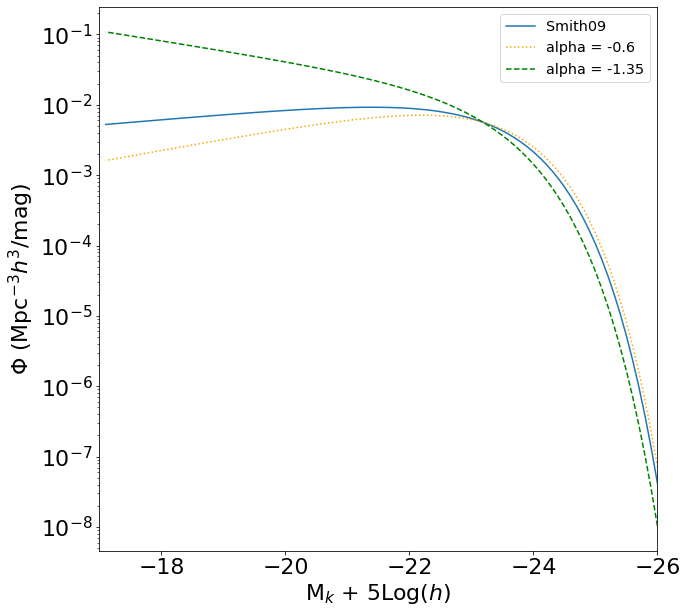

In [6]:
# Plot the Schechter Function

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the default values (y axis log)
# ADD HERE
ax.semilogy(MK,Schechter(MK),label='Smith09')

# Q2 solutions: change alpha
# ADD HERE
ax.semilogy(MK,Schechter(MK,alpha = -0.6),color = 'orange',linestyle = ':',label='alpha = -0.6')

ax.semilogy(MK,Schechter(MK,alpha = -1.35),color = 'green',linestyle = '--',label='alpha = -1.35')



# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

#set axis limits
plt.xlim(-17,-26)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Save to a file
# ax.set_rasterized(True)
# plt.savefig('Schechter.eps', rasterized=True, dpi=350)



In [7]:
# Schechter Luminosity Function in terms of Luminosity
def SchechterL(L,nstar=8e-3,Lstar=1.4e10,alpha=-0.7):
    # Inputs
    #    L, array of luminosities (Lsun)
    #    nstar = mean galaxy number density (Mpc ^-3)
    #    Lstar = characteristic luminosity (Lsun)
    #    alpha = faint end slope
    # Returns
    #    number density of galaxies (Mpc^-3)
    
    A = (L/Lstar)**alpha # the part of the equation that controls the faint end
    B = np.exp(-L/Lstar) # that part that controls the high luminosity end
    C = nstar/Lstar # constants
    return A*B*C

In [8]:
# Understand lambda functions
# short cut - defines and evaluates a funtion in one line!

x = lambda a,b : a*b
print(x(5,6))

30


In [13]:
# What fraction of the integrated luminosity density lies above L*
Lupper = quad(lambda L: L*SchechterL(L), 1.4e10, 1e14)
print(Lupper[0])

Ltotal = quad(lambda L: L*SchechterL(L), 0.1, 1e14)
print(Ltotal[0])

print(Lupper[0]/Ltotal[0])


49678654.46727106
100516717.98628208
0.4942327551328417


## Part B: IMF 

Create a function called {\it Salpeter} that defines the Salpeter IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}

$\alpha = 2.35$
The function should take as input an array of stellar masses, M. 
You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from 0.1 to 120 M$_\odot$
and setting the value to 1.  The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

Integration: quad(lambda x:  fxn(x),xmin,xmax)

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

In [14]:
# Function that evaluates the Salpeter Initial Mass Function (IMF)
# From 0.1-120 Msun
def Salpeter(M, Mmin=0.1,Mmax=120):
    # Inputs
    #    M is the stellar mass (Msun)
    #    Mmin is the minimun mass we consider (default is 0.1 Msun)
    #    Mmax is the maximun mass we consider (default is 120 Msun)
    # Returns
    #    the normalized Salpter IMF between Mmin amd Mmax
    
    alpha = 2.35 # Power law for the Salpeter IMF
    
    # Normalize the Salpeter IMF
    Norm = quad(lambda M: M**(-alpha), Mmin, Mmax)
    # Normalizing to 1
    A = 1./Norm[0]
    
    # Return the normalized Salpeter IMF
    return A*M**(-alpha)

## Q1: 
Integrate your normalized function to compute the fraction of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


In [16]:
Test = quad(lambda M: Salpeter(M), 0.1, 120)
print(Test[0])

1.0000000000000002


In [20]:
Test2 = quad(lambda M: Salpeter(M), 0.1, 1)
print(Test2[0])

# What is the number of stars from 0.1-1 solar mass, in a GMC of 1000 Msun
print(Test2[0]*1000)

0.9553982124994416
955.3982124994416


## Q2:

How might you modify the above to return the fraction of MASS ? instead of numbers of stars.

In [22]:
# Function that returns the fraction dirstribution of mass in stars 
# from 0.1-120 Msun

def SalpeterM(M,Mmin=0.1, Mmax=120):
    # Inputs 
    #    Mmin is the minimun mass we consider (default is 0.1 Msun)
    #    Mmax is the maximun mass we consider (default is 120 Msun)
    # Returns
    #    The normalized Salpeter IMF * Mass
    
    alpha = 2.35 # Slope for Salpeter IMF
    
    # Normalize the function
    Norm = quad(lambda M: M*M**(-alpha), Mmin, Mmax)
    A = 1./Norm[0]
    
    # return the normalized Salpeter IMF *M
    return A*M*M**(-alpha)

In [24]:
# Determine the fraction of mass in stars that are more massive than the Sun
MassAboveSun = quad(lambda M: SalpeterM(M), 1, 120)
print(MassAboveSun[0])

0.3961962675744314


In [26]:
# What about in a GMC of mass 5000
print(MassAboveSun[0]*5000)

1980.981337872157
